In [ ]:
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.constraints import Constraint
from keras import regularizers
from tensorflow.keras.constraints import max_norm
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd


### Por: Daniel Lillo Plaza y Carlos Blom-Dahl Ramos

## Conjuntos de datos


Primero construiremos los _dataset_ y los representaremos gráficamente. Fijamos una semilla aleatoria para que los resultados sean reproducibles.

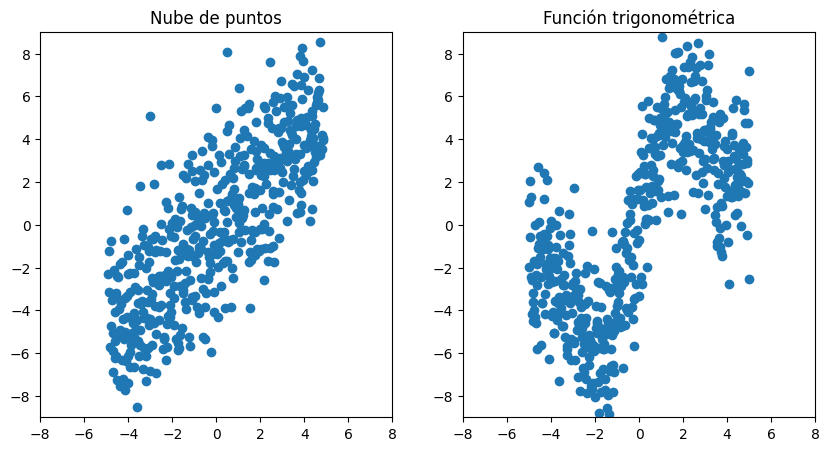

In [ ]:
# creamos los datos de entrada x e y (n puntos)
rng = np.random.default_rng(seed=123)
n = 500
x = np.linspace(-5, 5, n)
y = x + np.random.normal(scale=2.2, size=n)

# creamos un ángulo para inclinar la nube de puntos
angle = np.radians(1.7)

# rotamos los datos x e y
rot_x = x * np.cos(angle) - y * np.sin(angle)
rot_y = x * np.sin(angle) + y * np.cos(angle)

# combinamos los datos rotados en un solo conjunto de datos
data_1 = np.hstack((rot_x.reshape(-1, 1), rot_y.reshape(-1, 1)))

a = 3.3  # amplitud
b = 1.2  # inclinación
c = 0.2  # desplazamiento vertical
d = 2  # ruido

# Generamos los datos de la función seno con ruido
y = a * np.sin(x) + b * x + c + d * np.random.randn(len(x))

data_2 = np.hstack((x.reshape(-1, 1), y.reshape(-1, 1)))

# mostramos el scatterplot de los datos inclinados
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

plt.scatter(data_1[:, 0], data_1[:, 1])
plt.title('Nube de puntos')
plt.xlim(-8,8)
plt.ylim(-9,9)

plt.subplot(1,2,2)
plt.scatter(data_2[:, 0], data_2[:, 1])
plt.title('Función trigonométrica')
plt.xlim(-8,8)
plt.ylim(-9,9)
plt.show()


In [ ]:
wine = load_wine()

data_3 = pd.DataFrame(wine.data)
y = wine.target
scaler = StandardScaler()

# ajusta el scaler a los datos y normaliza el dataframe
data_3 = pd.DataFrame(scaler.fit_transform(data_3), columns=data_3.columns)

print("Forma de la matriz de datos:", data_3.shape)
print("Forma de la matriz de etiquetas:", y.shape)

Forma de la matriz de datos: (178, 13)
Forma de la matriz de etiquetas: (178,)


## PCA Sklearn

A continuación, realizaremos una PCA para proyectar los datos sobre una única dimensión, y tras ello procederemos a la reconstrucción de los mismos.

### Nube de puntos

D= [19.48961788] 

U=
 [[-0.57715023]
 [-0.81663799]] 

mu= [ 0.00099408 -0.03349398] 

perc= [0.90274501] 

Y.shape= (500, 1) 



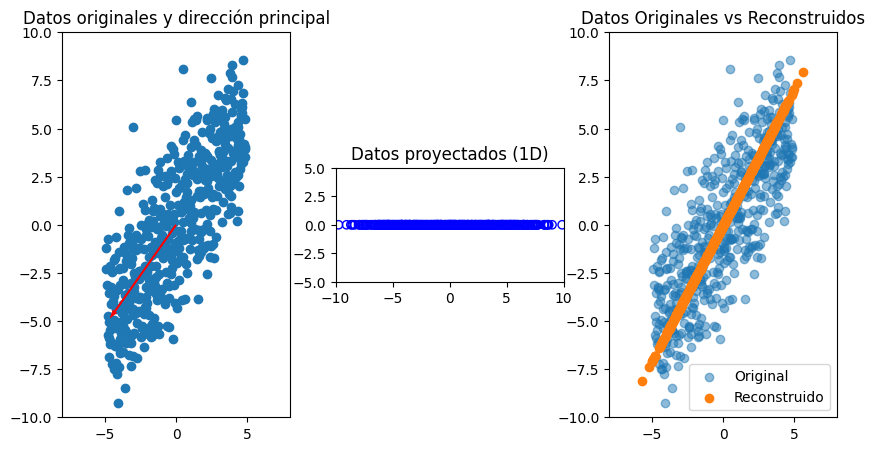

In [ ]:
pca = PCA(n_components = 1, svd_solver='full')
pca.fit(data_1)
D = pca.explained_variance_
U = pca.components_.T
mu = pca.mean_
perc = pca.explained_variance_ratio_
n_components = pca.n_components_
Y = pca.transform(data_1)
print('D=',D,'\n\nU=\n',U,'\n\nmu=',mu,'\n\nperc=',perc,'\n\nY.shape=',Y.shape,'\n')

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.scatter(data_1[:,0],data_1[:,1])
# cada eigenvector describe la dirección de un componente principal
matrix_mu = [mu,mu]
plt.quiver(*matrix_mu, U[0,0], U[1,0], color='red', scale=2)
plt.xlim(-8, 8) 
plt.ylim(-10, 10)
plt.title('Datos originales y dirección principal')

plt.subplot(1,3,2)
# plotear los datos proyectados
plt.scatter(Y[:, 0], [0] * len(Y[:, 0]), marker='o', facecolor='none', edgecolor='blue')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-10, 10)  # establecer los límites del eje X
plt.ylim(-5, 5)  # establecer los límites del eje Y
plt.title('Datos proyectados (1D)')

# Reconstruir los datos originales a partir de los datos transformados
data_1_reconstruido = pca.inverse_transform(Y)

# Graficar los datos originales junto con los datos reconstruidos
plt.subplot(1, 3, 3)
plt.scatter(data_1[:,0], data_1[:,1], alpha=0.5, label='Original')
plt.scatter(data_1_reconstruido[:,0], data_1_reconstruido[:,1], label='Reconstruido')
plt.xlim(-8, 8) 
plt.ylim(-10, 10)
plt.title('Datos Originales vs Reconstruidos')
plt.legend()
plt.show()

### Función trigonométrica

D= [22.5929051] 

U=
 [[0.50066004]
 [0.86564399]] 

mu= [1.98951966e-16 9.24217507e-02] 

perc= [0.86156045] 

Y.shape= (500, 1) 



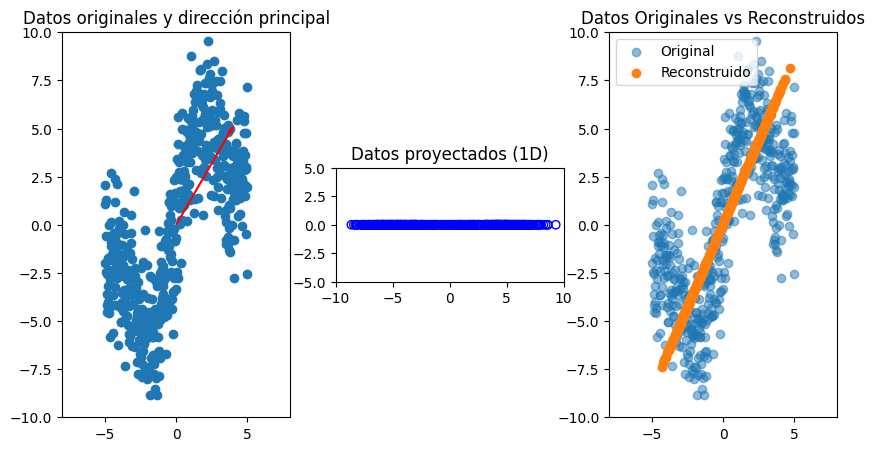

In [ ]:
pca = PCA(n_components = 1, svd_solver='full')
pca.fit(data_2)
D = pca.explained_variance_
U = pca.components_.T
mu = pca.mean_
perc = pca.explained_variance_ratio_
n_components = pca.n_components_
Y = pca.transform(data_2)
print('D=',D,'\n\nU=\n',U,'\n\nmu=',mu,'\n\nperc=',perc,'\n\nY.shape=',Y.shape,'\n')

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.scatter(data_2[:,0],data_2[:,1])
# cada eigenvector describe la dirección de un componente principal
matrix_mu = [mu,mu]
plt.quiver(*matrix_mu, U[0,0], U[1,0], color='red', scale=2)
plt.xlim(-8, 8) 
plt.ylim(-10, 10)
plt.title('Datos originales y dirección principal')

plt.subplot(1,3,2)
# plotear los datos proyectados
plt.scatter(Y[:, 0], [0] * len(Y[:, 0]), marker='o', facecolor='none', edgecolor='blue')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-10, 10)  # establecer los límites del eje X
plt.ylim(-5, 5)  # establecer los límites del eje Y
plt.title('Datos proyectados (1D)')

# Reconstruir los datos originales a partir de los datos transformados
data_2_reconstruido = pca.inverse_transform(Y)

# Graficar los datos originales junto con los datos reconstruidos
plt.subplot(1, 3, 3)
plt.scatter(data_2[:,0], data_2[:,1], alpha=0.5, label='Original')
plt.scatter(data_2_reconstruido[:,0], data_2_reconstruido[:,1], label='Reconstruido')
plt.xlim(-8, 8) 
plt.ylim(-10, 10)
plt.title('Datos Originales vs Reconstruidos')
plt.legend()
plt.show()

### Vinos

D= [4.73243698 2.51108093] 

U=
 [[ 0.1443294  -0.48365155]
 [-0.24518758 -0.22493093]
 [-0.00205106 -0.31606881]
 [-0.23932041  0.0105905 ]
 [ 0.14199204 -0.299634  ]
 [ 0.39466085 -0.06503951]
 [ 0.4229343   0.00335981]
 [-0.2985331  -0.02877949]
 [ 0.31342949 -0.03930172]
 [-0.0886167  -0.52999567]
 [ 0.29671456  0.27923515]
 [ 0.37616741  0.16449619]
 [ 0.28675223 -0.36490283]] 

mu= [ 7.84141790e-15  2.44498554e-16 -4.05917497e-15 -7.11041712e-17
 -2.49488320e-17 -1.95536471e-16  9.44313292e-16 -4.17892936e-16
 -1.54059038e-15 -4.12903170e-16  1.39838203e-15  2.12688793e-15
 -6.98567296e-17] 

perc= [0.36198848 0.1920749 ] 

Y.shape= (178, 2) 



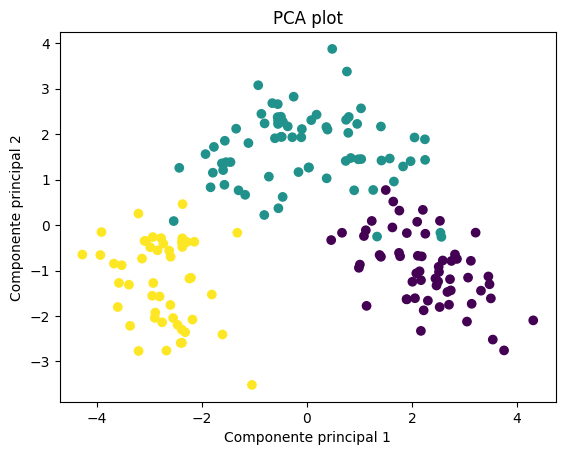

In [ ]:
pca = PCA(n_components = 2, svd_solver='full')
pca.fit(data_3)
D = pca.explained_variance_
U = pca.components_.T
mu = pca.mean_
perc = pca.explained_variance_ratio_
n_components = pca.n_components_
Y = pca.transform(data_3)
print('D=',D,'\n\nU=\n',U,'\n\nmu=',mu,'\n\nperc=',perc,'\n\nY.shape=',Y.shape,'\n')

fig, ax = plt.subplots()

# crea un scatter plot de los datos transformados, donde c1 y c2 son las dos componentes principales
ax.scatter(Y[:, 0], Y[:, 1], c=y) 

# establece los títulos y etiquetas de los ejes
ax.set_title('PCA plot')
ax.set_xlabel('Componente principal 1')
ax.set_ylabel('Componente principal 2')

# muestra el gráfico
plt.show()

Entonces obtenemos en los dos primeros casos que las reconstrucciones de la PCA no son precisas, en ambas se recupera una línea recta. En el caso de los vinos lo que podemos observar es que genera una decente representación pensando en la clasificación.

## MyPCA

In [ ]:
def mypca(X, n_components=0):
    import numpy as np
    
    # Computing eigenvalues and eigenvectors of covariance matrix from X data
    n, p = X.shape
    
    # Subtract the mean
    mu = X.mean(axis=0)
    X_c = np.subtract(X, mu)
    
    # Unbiased covariance estimate
    cov = np.cov(X_c.T)  # Transpose X_c to get the correct shape for cov
    # Eigendecomposition
    Lambda, U = np.linalg.eig(cov)
    
    # Sorting the eigenvalues in descending order
    idx = Lambda.argsort()[::-1]
    Lambda = Lambda[idx]
    
    # Sorting eigenvectors according to the sorted eigenvalues
    U = U[:, idx]
    
    if n_components < p and n_components > 0:
        U = U[:, :n_components]
        Lambda = Lambda[:n_components]  # Cutting some PCs if needed
        
    # Projection of the data in the new space
    Y = np.dot(U.T, X_c.T).T
    
    return Lambda, U, Y, mu

### Nube de puntos

Text(0.5, 1.0, 'Datos proyectados (1D)')

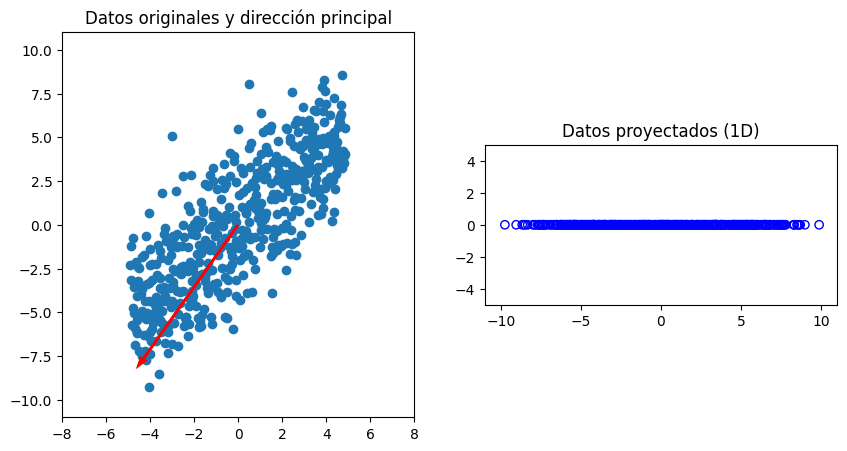

In [ ]:
n_components = 1
D,U,Y,mu = mypca(data_1,n_components)
perc = D/(sum(D))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(data_1[:,0],data_1[:,1])
# cada eigenvector describe la dirección de un componente principal
matrix_mu = [mu,mu]
plt.quiver(*matrix_mu, U[0,0], U[1,0], color='red', scale=2)
plt.xlim(-8, 8) 
plt.ylim(-11, 11)
plt.title('Datos originales y dirección principal')

plt.subplot(1,2,2)
# plotear los datos proyectados
plt.scatter(Y[:, 0], [0] * len(Y[:, 0]), marker='o', facecolor='none', edgecolor='blue')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-11, 11)  # establecer los límites del eje X
plt.ylim(-5, 5)  # establecer los límites del eje Y
plt.title('Datos proyectados (1D)')



### Función trigonométrica

Text(0.5, 1.0, 'Datos proyectados (1D)')

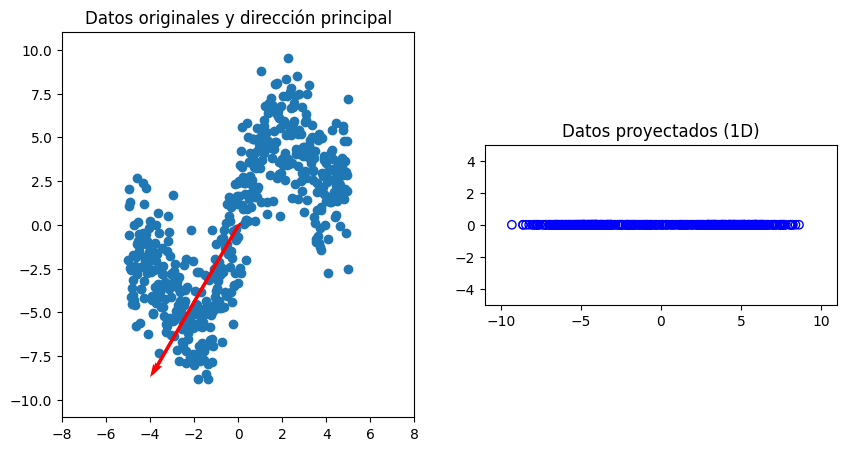

In [ ]:
n_components = 1
D,U,Y,mu = mypca(data_2,n_components)
perc = D/(sum(D))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(data_2[:,0],data_2[:,1])
# cada eigenvector describe la dirección de un componente principal
matrix_mu = [mu,mu]
plt.quiver(*matrix_mu, U[0,0], U[1,0], color='red', scale=2)
plt.xlim(-8, 8) 
plt.ylim(-11, 11)
plt.title('Datos originales y dirección principal')

plt.subplot(1,2,2)
# plotear los datos proyectados
plt.scatter(Y[:, 0], [0] * len(Y[:, 0]), marker='o', facecolor='none', edgecolor='blue')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-11, 11)  # establecer los límites del eje X
plt.ylim(-5, 5)  # establecer los límites del eje Y
plt.title('Datos proyectados (1D)')



### Vinos

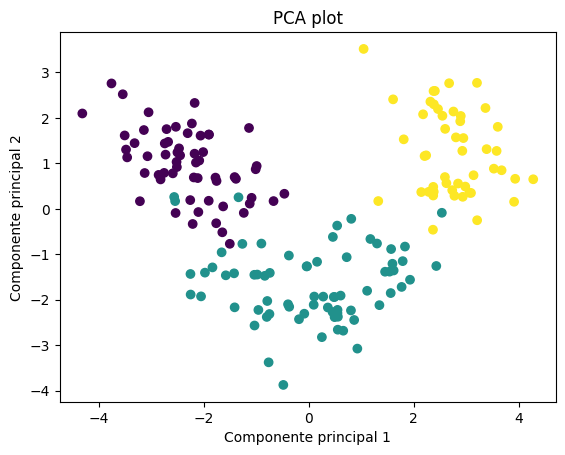

In [ ]:
n_components = 2
D,U,Y,mu = mypca(data_3,n_components)
perc = D/(sum(D))

fig, ax = plt.subplots()

# crea un scatter plot de los datos transformados, donde c1 y c2 son las dos componentes principales
ax.scatter(Y[:, 0], Y[:, 1], c=y) 

# establece los títulos y etiquetas de los ejes
ax.set_title('PCA plot')
ax.set_xlabel('Componente principal 1')
ax.set_ylabel('Componente principal 2')

# muestra el gráfico
plt.show()

Al usar nuestra función de PCA obtenemos las mismas transformaciones alvo quizás una rotación.

## Autoencoder lineal



A continuación crearemos un autoencoder lineal para cada dataset.

### Nube de puntos

In [ ]:
# Dividimos el conjunto de datos en train y test
train_data_1, test_data_1 = train_test_split(data_1, test_size=0.5, random_state=42)

Epoch 1/50
8/8 [==============================] - 5s 69ms/step - loss: 3.1095 - val_loss: 2.4709
Epoch 2/50
8/8 [==============================] - 0s 12ms/step - loss: 2.4894 - val_loss: 2.0643
Epoch 3/50
8/8 [==============================] - 0s 12ms/step - loss: 2.1296 - val_loss: 1.7395
Epoch 4/50
8/8 [==============================] - 0s 12ms/step - loss: 1.7802 - val_loss: 1.5248
Epoch 5/50
8/8 [==============================] - 0s 17ms/step - loss: 1.5345 - val_loss: 1.4077
Epoch 6/50
8/8 [==============================] - 0s 12ms/step - loss: 1.4155 - val_loss: 1.3456
Epoch 7/50
8/8 [==============================] - 0s 20ms/step - loss: 1.3203 - val_loss: 1.2974
Epoch 8/50
8/8 [==============================] - 0s 22ms/step - loss: 1.2635 - val_loss: 1.2574
Epoch 9/50
8/8 [==============================] - 0s 12ms/step - loss: 1.2161 - val_loss: 1.2179
Epoch 10/50
8/8 [==============================] - 0s 13ms/step - loss: 1.1777 - val_loss: 1.1759
Epoch 11/50
8/8 [============

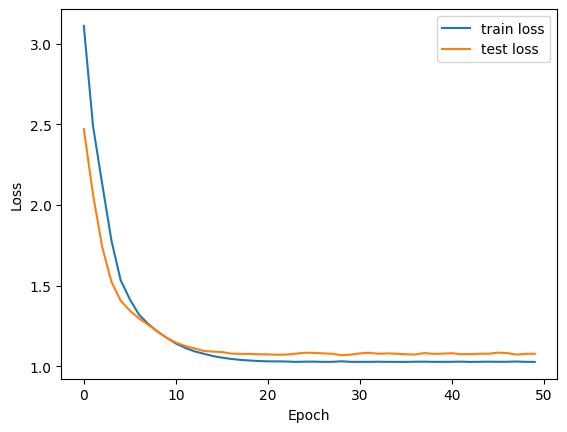

In [ ]:
input_size = train_data_1.shape[1]
output_size = 1

input_layer = Input(shape=(input_size,))
encoded = Dense(8, activation='linear')(input_layer)
encoded = Dense(4, activation='linear')(encoded)
encoded = Dense(output_size, activation='linear')(encoded)

decoded = Dense(4, activation='linear')(encoded)
decoded = Dense(8, activation='linear')(decoded)
decoded = Dense(input_size, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(train_data_1, train_data_1, epochs=50, batch_size=32, validation_data = (test_data_1, test_data_1))

train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Graficar ambas curvas de pérdida
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



Ahora dividimos el anterior _autoencoder_, ya entrenado, en dos partes: codificador (_encoder_) y decodificador (_decoder_).

8/8 [==============================] - 0s 2ms/step


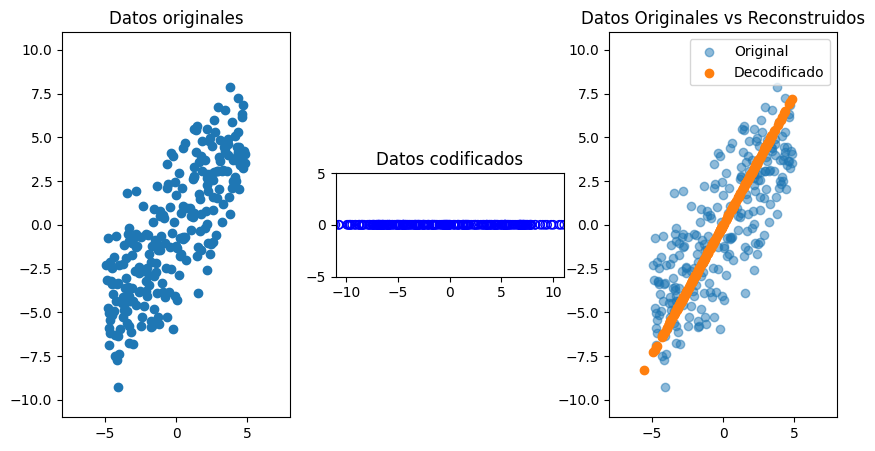

In [ ]:
# Codificador
input_layer = autoencoder.input

encoded = autoencoder.layers[1](input_layer)
encoded = autoencoder.layers[2](encoded)
encoded = autoencoder.layers[3](encoded)

encoder_model = Model(input_layer, encoded)

# Decodificador
encoded_input = Input(shape=(output_size,))
decoded = autoencoder.layers[4](encoded_input)
decoded = autoencoder.layers[5](decoded)
decoded = autoencoder.layers[6](decoded)

decoder_model = Model(encoded_input, decoded)


# Graficamos los resultados
Z_linAutEnc = encoder_model.predict(test_data_1)
data_1_decoded = decoder_model.predict(Z_linAutEnc)


plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.scatter(test_data_1[:,0],test_data_1[:,1])
plt.xlim(-8, 8) 
plt.ylim(-11, 11)
plt.title('Datos originales')

plt.subplot(1, 3, 2)
plt.scatter(Z_linAutEnc[:, 0], [0] * len(Z_linAutEnc[:, 0]), marker='o', facecolor='none', edgecolor='blue')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-11, 11)
plt.ylim(-5, 5)
plt.title('Datos codificados')

plt.subplot(1, 3, 3)
plt.scatter(test_data_1[:,0], test_data_1[:,1], alpha=0.5, label='Original')
plt.scatter(data_1_decoded[:,0], data_1_decoded[:,1], label='Decodificado')
plt.xlim(-8, 8) 
plt.ylim(-11, 11)
plt.title('Datos Originales vs Reconstruidos')
plt.legend()
plt.show()

### Función trigonométrica

In [ ]:
# Dividimos el conjunto de datos en train y test
train_data_2, test_data_2 = train_test_split(data_2, test_size=0.5, random_state=42)

A continuación crearemos un autoencoder lineal.

Epoch 1/50
8/8 [==============================] - 2s 24ms/step - loss: 11.5792 - val_loss: 12.9556
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 11.0073 - val_loss: 12.2599
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 10.2784 - val_loss: 11.3132
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 9.3601 - val_loss: 10.0622
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 8.1337 - val_loss: 8.5629
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 6.7733 - val_loss: 6.8450
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 5.3391 - val_loss: 5.1365
Epoch 8/50
8/8 [==============================] - 0s 8ms/step - loss: 4.0495 - val_loss: 3.7967
Epoch 9/50
8/8 [==============================] - 0s 8ms/step - loss: 3.2471 - val_loss: 2.9852
Epoch 10/50
8/8 [==============================] - 0s 9ms/step - loss: 2.8266 - val_loss: 2.6447
Epoch 11/50
8/8 [==============

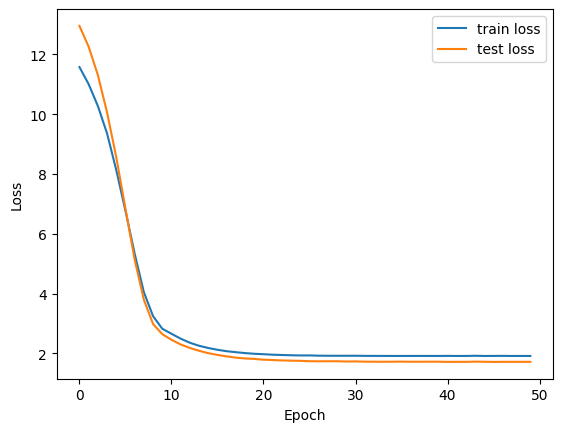

In [ ]:
input_size = train_data_2.shape[1]
output_size = 1

input_layer = Input(shape=(input_size,))
encoded = Dense(8, activation='linear')(input_layer)
encoded = Dense(4, activation='linear')(encoded)
encoded = Dense(output_size, activation='linear')(encoded)
decoded = Dense(4, activation='linear')(encoded)
decoded = Dense(8, activation='linear')(decoded)
decoded = Dense(input_size, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(train_data_2, train_data_2, epochs=50, batch_size=32,validation_data=(test_data_2, test_data_2))

train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Graficar ambas curvas de pérdida
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Ahora dividimos el anterior _autoencoder_, ya entrenado, en dos partes: codificador (_encoder_) y decodificador (_decoder_).

8/8 [==============================] - 0s 2ms/step


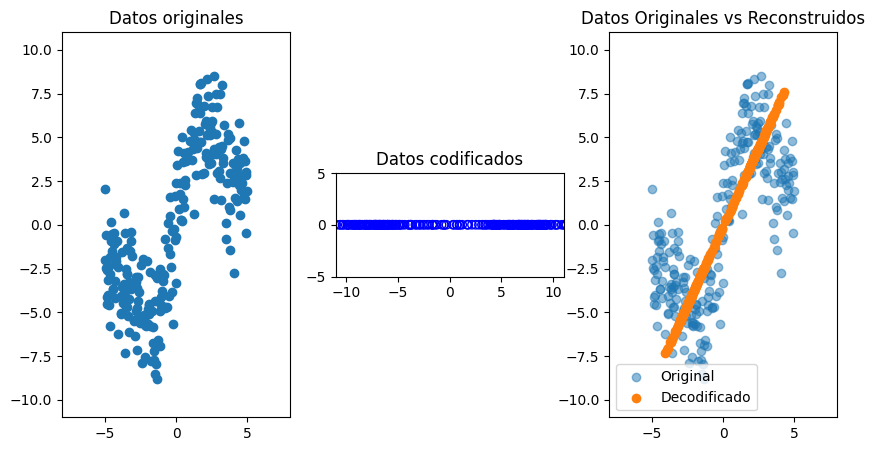

In [ ]:
# Codificador
input_layer = autoencoder.input

encoded = autoencoder.layers[1](input_layer)
encoded = autoencoder.layers[2](encoded)
encoded = autoencoder.layers[3](encoded)

encoder_model = Model(input_layer, encoded)

# Decodificador
encoded_input = Input(shape=(output_size,))
decoded = autoencoder.layers[4](encoded_input)
decoded = autoencoder.layers[5](decoded)
decoded = autoencoder.layers[6](decoded)

decoder_model = Model(encoded_input, decoded)


# Graficamos los resultados
Z_linAutEnc = encoder_model.predict(test_data_2)
data_2_decoded = decoder_model.predict(Z_linAutEnc)


plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.scatter(test_data_2[:,0],test_data_2[:,1])
plt.xlim(-8, 8) 
plt.ylim(-11, 11)
plt.title('Datos originales')

plt.subplot(1, 3, 2)
plt.scatter(Z_linAutEnc[:, 0], [0] * len(Z_linAutEnc[:, 0]), marker='o', facecolor='none', edgecolor='blue')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-11, 11)
plt.ylim(-5, 5)
plt.title('Datos codificados')

plt.subplot(1, 3, 3)
plt.scatter(test_data_2[:,0], test_data_2[:,1], alpha=0.5, label='Original')
plt.scatter(data_2_decoded[:,0], data_2_decoded[:,1], label='Decodificado')
plt.xlim(-8, 8) 
plt.ylim(-11, 11)
plt.title('Datos Originales vs Reconstruidos')
plt.legend()
plt.show()

### Vinos

In [ ]:
# Dividimos el conjunto de datos en train y test
train_data_3, test_data_3, y_train, y_test = train_test_split(data_3,y, test_size=0.5, random_state=42)

Epoch 1/100
3/3 [==============================] - 3s 121ms/step - loss: 1.6529 - val_loss: 1.3165
Epoch 2/100
3/3 [==============================] - 0s 41ms/step - loss: 1.5545 - val_loss: 1.2497
Epoch 3/100
3/3 [==============================] - 0s 31ms/step - loss: 1.4627 - val_loss: 1.1930
Epoch 4/100
3/3 [==============================] - 0s 45ms/step - loss: 1.3935 - val_loss: 1.1442
Epoch 5/100
3/3 [==============================] - 0s 46ms/step - loss: 1.3235 - val_loss: 1.1039
Epoch 6/100
3/3 [==============================] - 0s 37ms/step - loss: 1.2707 - val_loss: 1.0689
Epoch 7/100
3/3 [==============================] - 0s 65ms/step - loss: 1.2262 - val_loss: 1.0393
Epoch 8/100
3/3 [==============================] - 0s 40ms/step - loss: 1.1868 - val_loss: 1.0140
Epoch 9/100
3/3 [==============================] - 0s 39ms/step - loss: 1.1525 - val_loss: 0.9922
Epoch 10/100
3/3 [==============================] - 0s 32ms/step - loss: 1.1244 - val_loss: 0.9734
Epoch 11/100
3/3 [

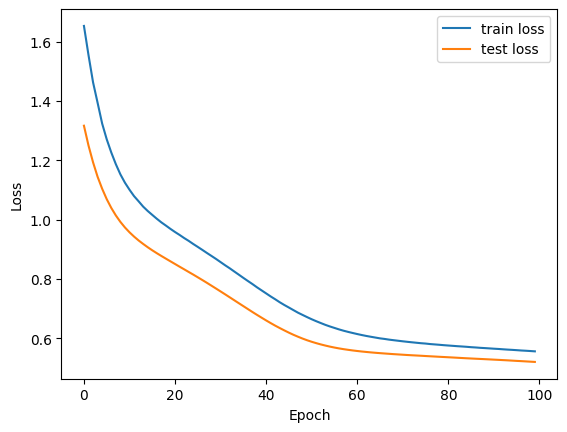

In [ ]:
input_size = train_data_3.shape[1]
output_size = 2

input_layer = Input(shape=(input_size,))
encoded = Dense(8, activation='linear')(input_layer)
encoded = Dense(4, activation='linear')(encoded)
encoded = Dense(output_size, activation='linear')(encoded)
decoded = Dense(4, activation='linear')(encoded)
decoded = Dense(8, activation='linear')(decoded)
decoded = Dense(input_size, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(train_data_3, train_data_3, epochs=100, batch_size=32,validation_data=(test_data_3, test_data_3))

train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Graficar ambas curvas de pérdida
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

3/3 [==============================] - 0s 5ms/step


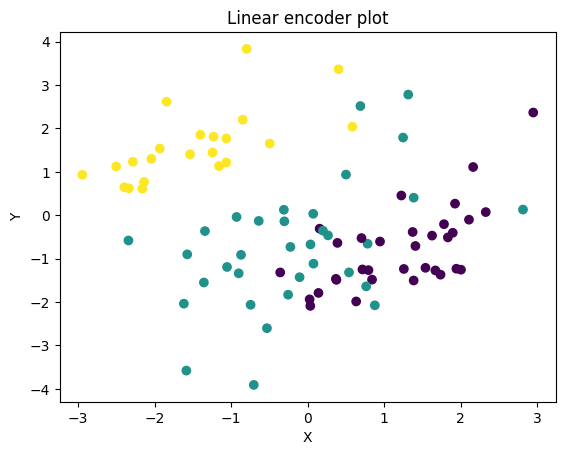

In [ ]:
# Codificador
input_layer = autoencoder.input

encoded = autoencoder.layers[1](input_layer)
encoded = autoencoder.layers[2](encoded)
encoded = autoencoder.layers[3](encoded)

encoder_model = Model(input_layer, encoded)

# Decodificador
encoded_input = Input(shape=(output_size,))
decoded = autoencoder.layers[4](encoded_input)
decoded = autoencoder.layers[5](decoded)
decoded = autoencoder.layers[6](decoded)

decoder_model = Model(encoded_input, decoded)


# Graficamos los resultados
Z_linAutEnc = encoder_model.predict(test_data_3)
data_3_decoded = decoder_model.predict(Z_linAutEnc)


fig, ax = plt.subplots()

# crea un scatter plot de los datos transformados, donde c1 y c2 son las dos componentes principales
ax.scatter(Z_linAutEnc[:, 0], Z_linAutEnc[:, 1], c=y_test) 

# establece los títulos y etiquetas de los ejes
ax.set_title('Linear encoder plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# muestra el gráfico
plt.show()


Otra vez en ambos datasets bidimensionales obtenemos una reconstrucción unidimensional (se ha perdido información). En el caso del dataset de los vinos encontramos una representación peor que en la de la PCA de cara a la clasificación.

## Autoencoder no lineal



A continuación crearemos un autoencoder no lineal para cada dataset.

### Nube de puntos

Epoch 1/100
8/8 [==============================] - 2s 25ms/step - loss: 10.5998 - val_loss: 10.9593
Epoch 2/100
8/8 [==============================] - 0s 15ms/step - loss: 10.2236 - val_loss: 10.5534
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 9.7912 - val_loss: 10.0904
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 9.2898 - val_loss: 9.5414
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 8.7124 - val_loss: 8.9098
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 8.0794 - val_loss: 8.2091
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 7.4161 - val_loss: 7.4615
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 6.7390 - val_loss: 6.7110
Epoch 9/100
8/8 [==============================] - 0s 8ms/step - loss: 6.0480 - val_loss: 6.0085
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 5.4521 - val_loss: 5.3551
Epoch 11/100
8/8 [==

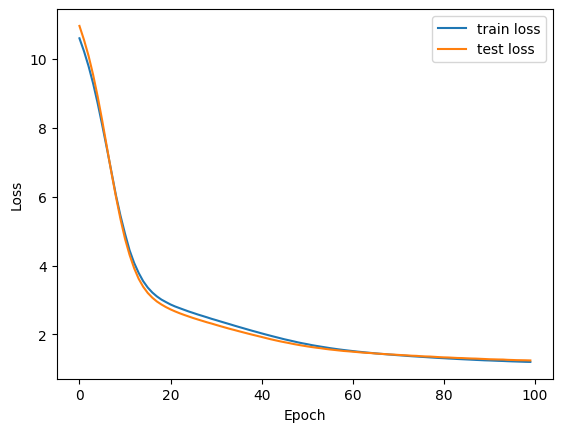

In [ ]:
input_size = train_data_1.shape[1]
output_size = 1

input_layer = Input(shape=(input_size,))
encoded = Dense(8, activation='tanh')(input_layer)
encoded = Dense(4, activation='linear')(encoded)
encoded = Dense(output_size, activation='linear')(encoded)
decoded = Dense(4, activation='tanh')(encoded)
decoded = Dense(8, activation='linear')(decoded)
decoded = Dense(input_size, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='mse')

history = autoencoder.fit(train_data_1, train_data_1, epochs=100, batch_size=32,validation_data=(test_data_1, test_data_1))

train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Graficar ambas curvas de pérdida
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Ahora dividimos el anterior _autoencoder_, ya entrenado, en dos partes: codificador (_encoder_) y decodificador (_decoder_).

8/8 [==============================] - 0s 2ms/step


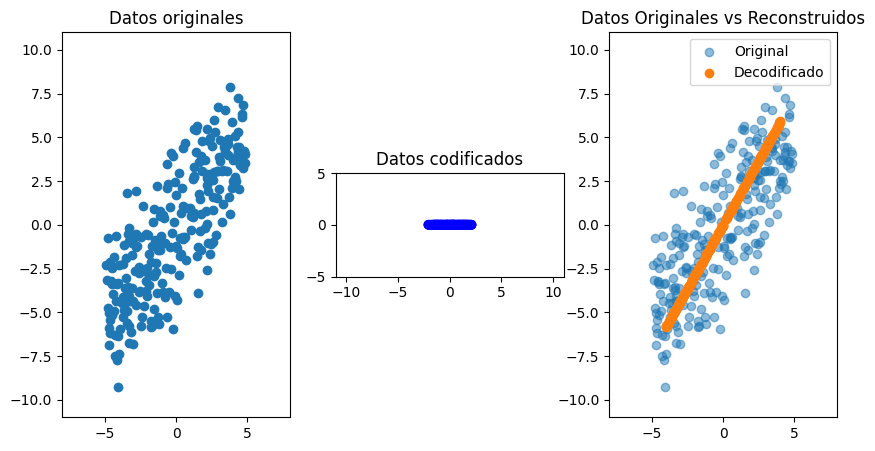

In [ ]:
# Codificador
input_layer = autoencoder.input

encoded = autoencoder.layers[1](input_layer)
encoded = autoencoder.layers[2](encoded)
encoded = autoencoder.layers[3](encoded)

encoder_model = Model(input_layer, encoded)

# Decodificador
encoded_input = Input(shape=(output_size,))
decoded = autoencoder.layers[4](encoded_input)
decoded = autoencoder.layers[5](decoded)
decoded = autoencoder.layers[6](decoded)

decoder_model = Model(encoded_input, decoded)


# Graficamos los resultados
Z_linAutEnc = encoder_model.predict(test_data_1)
data_1_decoded = decoder_model.predict(Z_linAutEnc)


plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.scatter(test_data_1[:,0],test_data_1[:,1])
plt.xlim(-8, 8) 
plt.ylim(-11, 11)
plt.title('Datos originales')

plt.subplot(1, 3, 2)
plt.scatter(Z_linAutEnc[:, 0], [0] * len(Z_linAutEnc[:, 0]), marker='o', facecolor='none', edgecolor='blue')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-11, 11)
plt.ylim(-5, 5)
plt.title('Datos codificados')

plt.subplot(1, 3, 3)
plt.scatter(test_data_1[:,0],test_data_1[:,1], alpha=0.5, label='Original')
plt.scatter(data_1_decoded[:,0], data_1_decoded[:,1], label='Decodificado')
plt.xlim(-8, 8) 
plt.ylim(-11, 11)
plt.title('Datos Originales vs Reconstruidos')
plt.legend()
plt.show()

### Función trigonométrica


A continuación crearemos un autoencoder no lineal.

Epoch 1/100
8/8 [==============================] - 4s 51ms/step - loss: 5.4579 - val_loss: 5.5336
Epoch 2/100
8/8 [==============================] - 0s 21ms/step - loss: 4.8696 - val_loss: 4.8718
Epoch 3/100
8/8 [==============================] - 0s 21ms/step - loss: 4.3610 - val_loss: 4.3090
Epoch 4/100
8/8 [==============================] - 0s 25ms/step - loss: 3.9260 - val_loss: 3.8617
Epoch 5/100
8/8 [==============================] - 0s 24ms/step - loss: 3.6179 - val_loss: 3.5022
Epoch 6/100
8/8 [==============================] - 0s 22ms/step - loss: 3.3716 - val_loss: 3.2333
Epoch 7/100
8/8 [==============================] - 0s 22ms/step - loss: 3.2072 - val_loss: 3.0315
Epoch 8/100
8/8 [==============================] - 0s 19ms/step - loss: 3.0737 - val_loss: 2.8964
Epoch 9/100
8/8 [==============================] - 0s 22ms/step - loss: 2.9959 - val_loss: 2.7939
Epoch 10/100
8/8 [==============================] - 0s 22ms/step - loss: 2.9359 - val_loss: 2.7198
Epoch 11/100
8/8 [=

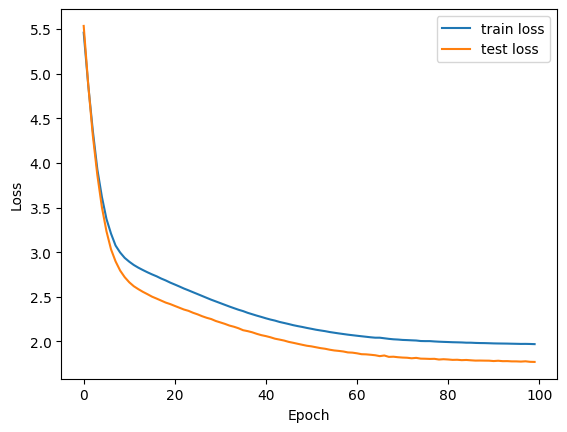

In [ ]:
input_size = train_data_2.shape[1]
output_size = 1

input_layer = Input(shape=(input_size,))
encoded = Dense(8, activation='tanh')(input_layer)
encoded = Dense(4, activation='linear')(encoded)
encoded = Dense(output_size, activation='linear')(encoded)
decoded = Dense(4, activation='tanh')(encoded)
decoded = Dense(8, activation='linear')(decoded)
decoded = Dense(input_size, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(train_data_2, train_data_2, epochs=100, batch_size=32,validation_data=(test_data_2,test_data_2))

train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Graficar ambas curvas de pérdida
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


Ahora dividimos el anterior _autoencoder_, ya entrenado, en dos partes: codificador (_encoder_) y decodificador (_decoder_).

8/8 [==============================] - 0s 3ms/step


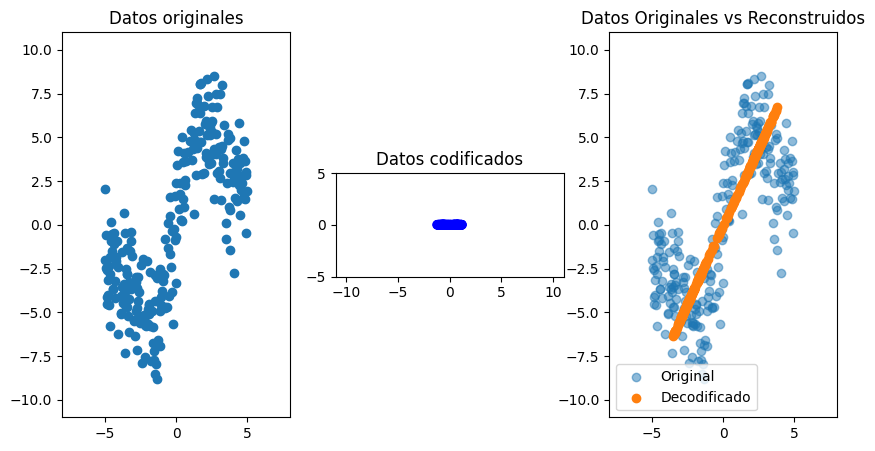

In [ ]:
# Codificador
input_layer = autoencoder.input

encoded = autoencoder.layers[1](input_layer)
encoded = autoencoder.layers[2](encoded)
encoded = autoencoder.layers[3](encoded)

encoder_model = Model(input_layer, encoded)

# Decodificador
encoded_input = Input(shape=(output_size,))
decoded = autoencoder.layers[4](encoded_input)
decoded = autoencoder.layers[5](decoded)
decoded = autoencoder.layers[6](decoded)

decoder_model = Model(encoded_input, decoded)


# Graficamos los resultados
Z_linAutEnc = encoder_model.predict(test_data_2)
data_2_decoded = decoder_model.predict(Z_linAutEnc)


plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.scatter(test_data_2[:,0],test_data_2[:,1])
plt.xlim(-8, 8) 
plt.ylim(-11, 11)
plt.title('Datos originales')

plt.subplot(1, 3, 2)
plt.scatter(Z_linAutEnc[:, 0], [0] * len(Z_linAutEnc[:, 0]), marker='o', facecolor='none', edgecolor='blue')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-11, 11)
plt.ylim(-5, 5)
plt.title('Datos codificados')

plt.subplot(1, 3, 3)
plt.scatter(test_data_2[:,0], test_data_2[:,1], alpha=0.5, label='Original')
plt.scatter(data_2_decoded[:,0], data_2_decoded[:,1], label='Decodificado')
plt.xlim(-8, 8) 
plt.ylim(-11, 11)
plt.title('Datos Originales vs Reconstruidos')
plt.legend()
plt.show()

### Vinos

Epoch 1/100
3/3 [==============================] - 46s 80ms/step - loss: 1.4507 - val_loss: 1.3561
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 1.3843 - val_loss: 1.2974
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 1.3225 - val_loss: 1.2441
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 1.2670 - val_loss: 1.1957
Epoch 5/100
3/3 [==============================] - 0s 24ms/step - loss: 1.2200 - val_loss: 1.1518
Epoch 6/100
3/3 [==============================] - 0s 24ms/step - loss: 1.1771 - val_loss: 1.1127
Epoch 7/100
3/3 [==============================] - 0s 26ms/step - loss: 1.1362 - val_loss: 1.0786
Epoch 8/100
3/3 [==============================] - 0s 17ms/step - loss: 1.1038 - val_loss: 1.0484
Epoch 9/100
3/3 [==============================] - 0s 17ms/step - loss: 1.0738 - val_loss: 1.0222
Epoch 10/100
3/3 [==============================] - 0s 25ms/step - loss: 1.0487 - val_loss: 0.9991
Epoch 11/100
3/3 [

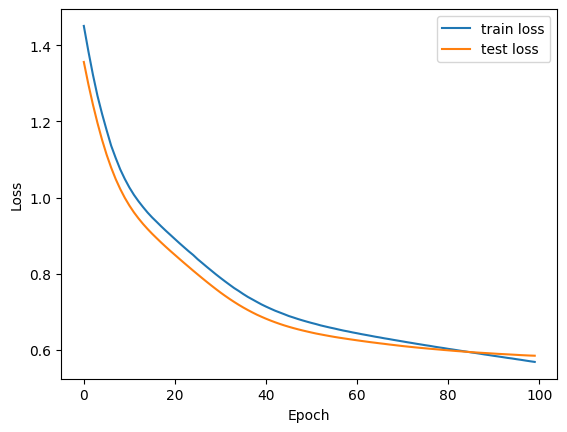

In [ ]:
input_size = train_data_3.shape[1]
output_size = 2

input_layer = Input(shape=(input_size,))
encoded = Dense(8, activation='tanh')(input_layer)
encoded = Dense(4, activation='linear')(encoded)
encoded = Dense(output_size, activation='linear')(encoded)
decoded = Dense(4, activation='tanh')(encoded)
decoded = Dense(8, activation='linear')(decoded)
decoded = Dense(input_size, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(train_data_3, train_data_3, epochs=100, batch_size=32,validation_data=(test_data_3,test_data_3))

train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Graficar ambas curvas de pérdida
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


3/3 [==============================] - 0s 4ms/step


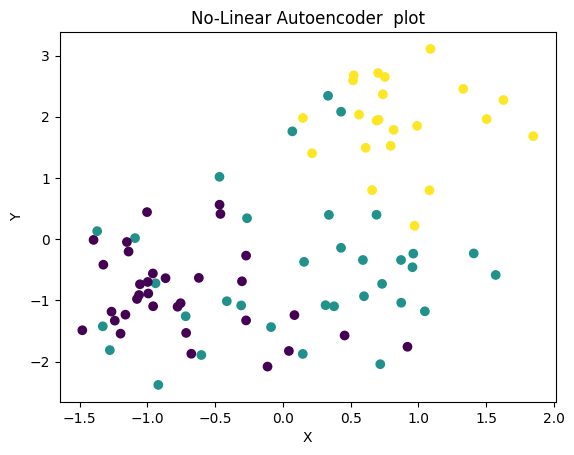

In [ ]:
input_layer = autoencoder.input

encoded = autoencoder.layers[1](input_layer)
encoded = autoencoder.layers[2](encoded)
encoded = autoencoder.layers[3](encoded)

encoder_model = Model(input_layer, encoded)

# Decodificador
encoded_input = Input(shape=(output_size,))
decoded = autoencoder.layers[4](encoded_input)
decoded = autoencoder.layers[5](decoded)
decoded = autoencoder.layers[6](decoded)

decoder_model = Model(encoded_input, decoded)


# Graficamos los resultados
Z_linAutEnc = encoder_model.predict(test_data_3)
data_3_decoded = decoder_model.predict(Z_linAutEnc)

fig, ax = plt.subplots()

# crea un scatter plot de los datos transformados, donde c1 y c2 son las dos componentes principales
ax.scatter(Z_linAutEnc[:, 0], Z_linAutEnc[:, 1], c=y_test) 

# establece los títulos y etiquetas de los ejes
ax.set_title('No-Linear Autoencoder  plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# muestra el gráfico
plt.show()

Observamos que en los 3 datasets no mejoramos los resultados al utilizar un autoencoder no lineal. 

## Constraints



Para agregar la restricción de pesos ortogonales, empleamos la función de regularización llamada "Orthogonal". Esta restricción fuerza a que los pesos de la red sean una matriz ortogonal.

Además, hemos agregado una restricción de peso $L^1$ para regularizar los pesos de la red. La regularización $L^1$ reduce la complejidad de la red penalizando los pesos más grandes y forzando algunos de ellos a cero. Esto puede mejorar la generalización del modelo y prevenir el sobreajuste.

### Autoencoder Lineal

In [ ]:
tf.config.run_functions_eagerly(True)

class OrtogonalidadPesosConstraint(tf.keras.constraints.Constraint):
  def __init__(self, dimension_codificacion, weightage=1.0,axis=0):
    self.dimension_codificacion=dimension_codificacion
    self.weightage = weightage
    self.axis = axis

  def ortogonalidad_pesos(self,w):
    if (self.axis==1):
      w=tf.keras.backend.transpose(w)
    if (self.dimension_codificacion>1):
      m=tf.keras.backend.dot(tf.keras.backend.transpose(w), tf.Variable(w))-tf.keras.backend.eye(self.dimension_codificacion)
      return self.weightage*tf.keras.backend.sqrt(tf.keras.backend.sum(tf.keras.backend.square(m)))
    else:
      m=tf.keras.backend.sum(w**2)-1
      return m

  def __call__(self, w):
    return self.ortogonalidad_pesos(w)

    tf.data.experimental.enable_debug_mode()

#### Nube de puntos

Epoch 1/100


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


8/8 [==============================] - 1s 125ms/step - loss: 15.3945 - val_loss: 15.4315
Epoch 2/100
8/8 [==============================] - 1s 102ms/step - loss: 14.4398 - val_loss: 14.4911
Epoch 3/100
8/8 [==============================] - 1s 110ms/step - loss: 13.7126 - val_loss: 13.8516
Epoch 4/100
8/8 [==============================] - 1s 98ms/step - loss: 13.2732 - val_loss: 13.4101
Epoch 5/100
8/8 [==============================] - 1s 115ms/step - loss: 12.9130 - val_loss: 13.0202
Epoch 6/100
8/8 [==============================] - 1s 99ms/step - loss: 12.5662 - val_loss: 12.6609
Epoch 7/100
8/8 [==============================] - 1s 117ms/step - loss: 12.2470 - val_loss: 12.3449
Epoch 8/100
8/8 [==============================] - 1s 142ms/step - loss: 11.9638 - val_loss: 12.0623
Epoch 9/100
8/8 [==============================] - 1s 144ms/step - loss: 11.7170 - val_loss: 11.7976
Epoch 10/100
8/8 [==============================] - 1s 102ms/step - loss: 11.4871 - val_loss: 11.5572
Epo

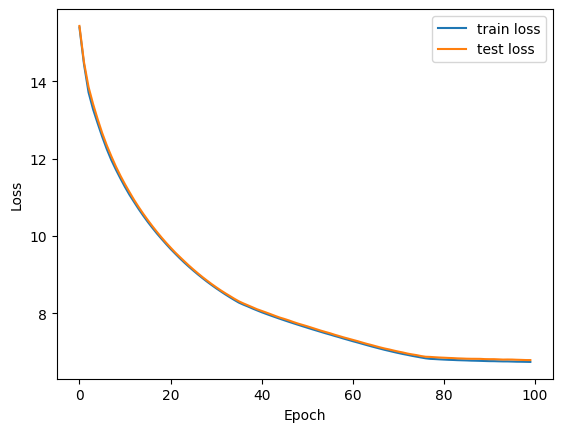

In [ ]:

input_size = train_data_1.shape[1]
output_size = 1

regularizer_input = OrtogonalidadPesosConstraint(dimension_codificacion=input_size, weightage=1., axis=0)
regularizer8 = OrtogonalidadPesosConstraint(dimension_codificacion=8, weightage=1., axis=0)
regularizer4 = OrtogonalidadPesosConstraint(dimension_codificacion=4, weightage=1., axis=0)
regularizer_output = OrtogonalidadPesosConstraint(dimension_codificacion=output_size, weightage=1., axis=0)

maxi = tf.keras.constraints.MaxNorm(max_value=2, axis=1)

input_layer = Input(shape=(input_size,))
encoded = Dense(8, activation='linear', kernel_constraint = maxi, kernel_regularizer=regularizer8)(input_layer)
encoded = Dense(4, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer4)(encoded)
encoded = Dense(output_size, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer_output)(encoded)

decoded = Dense(4, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer4)(encoded)
decoded = Dense(8, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer8)(decoded)
decoded = Dense(input_size, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer_input)(decoded)

autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(train_data_1, train_data_1, epochs=100, batch_size=32, validation_data=(test_data_1, test_data_1))

train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Graficar ambas curvas de pérdida
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

8/8 [==============================] - 0s 3ms/step


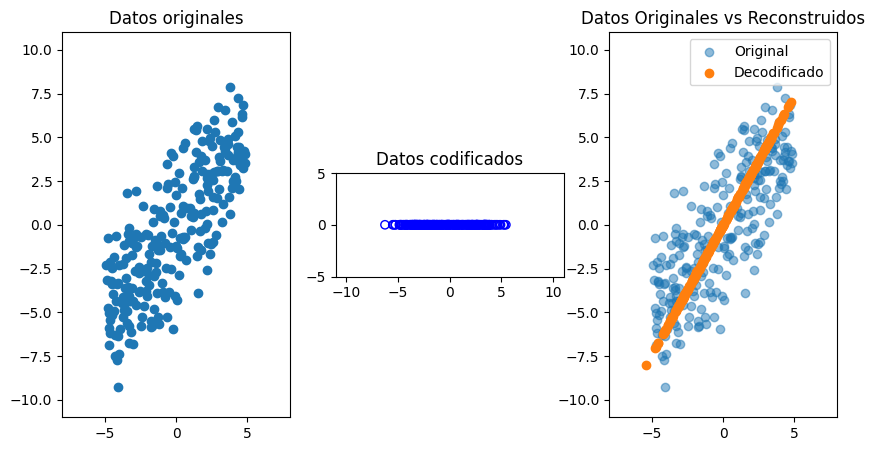

In [ ]:
# Codificador
input_layer = autoencoder.input

encoded = autoencoder.layers[1](input_layer)
encoded = autoencoder.layers[2](encoded)
encoded = autoencoder.layers[3](encoded)

encoder_model = Model(input_layer, encoded)

# Decodificador
encoded_input = Input(shape=(output_size,))
decoded = autoencoder.layers[4](encoded_input)
decoded = autoencoder.layers[5](decoded)
decoded = autoencoder.layers[6](decoded)

decoder_model = Model(encoded_input, decoded)


# Graficamos los resultados
Z_linAutEnc = encoder_model.predict(test_data_1)
data_1_decoded = decoder_model.predict(Z_linAutEnc)


plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.scatter(test_data_1[:,0],test_data_1[:,1])
plt.xlim(-8, 8) 
plt.ylim(-11, 11)
plt.title('Datos originales')

plt.subplot(1, 3, 2)
plt.scatter(Z_linAutEnc[:, 0], [0] * len(Z_linAutEnc[:, 0]), marker='o', facecolor='none', edgecolor='blue')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-11, 11)
plt.ylim(-5, 5)
plt.title('Datos codificados')

plt.subplot(1, 3, 3)
plt.scatter(test_data_1[:,0], test_data_1[:,1], alpha=0.5, label='Original')
plt.scatter(data_1_decoded[:,0], data_1_decoded[:,1], label='Decodificado')
plt.xlim(-8, 8) 
plt.ylim(-11, 11)
plt.title('Datos Originales vs Reconstruidos')
plt.legend()
plt.show()

#### Función trigonométrica

Epoch 1/100
8/8 [==============================] - 1s 121ms/step - loss: 66.5903 - val_loss: 66.6577
Epoch 2/100
8/8 [==============================] - 2s 333ms/step - loss: 56.9834 - val_loss: 57.1242
Epoch 3/100
8/8 [==============================] - 1s 113ms/step - loss: 49.3427 - val_loss: 49.9688
Epoch 4/100
8/8 [==============================] - 1s 115ms/step - loss: 43.7262 - val_loss: 44.5674
Epoch 5/100
8/8 [==============================] - 1s 112ms/step - loss: 39.5510 - val_loss: 40.4473
Epoch 6/100
8/8 [==============================] - 1s 94ms/step - loss: 36.3221 - val_loss: 37.3394
Epoch 7/100
8/8 [==============================] - 1s 114ms/step - loss: 33.8610 - val_loss: 34.9189
Epoch 8/100
8/8 [==============================] - 1s 115ms/step - loss: 31.8677 - val_loss: 33.0678
Epoch 9/100
8/8 [==============================] - 1s 97ms/step - loss: 30.3515 - val_loss: 31.5860
Epoch 10/100
8/8 [==============================] - 1s 100ms/step - loss: 29.1361 - val_loss:

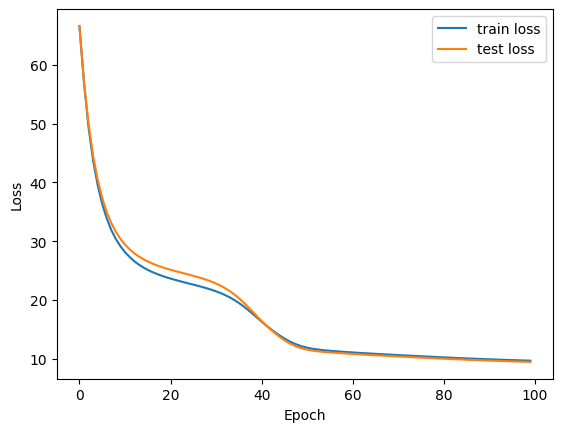

In [ ]:
input_size = train_data_2.shape[1]
output_size = 1

regularizer_input = OrtogonalidadPesosConstraint(dimension_codificacion=input_size, weightage=1., axis=0)
regularizer8 = OrtogonalidadPesosConstraint(dimension_codificacion=8, weightage=1., axis=0)
regularizer4 = OrtogonalidadPesosConstraint(dimension_codificacion=4, weightage=1., axis=0)
regularizer_output = OrtogonalidadPesosConstraint(dimension_codificacion=output_size, weightage=1., axis=0)

maxi = tf.keras.constraints.MaxNorm(max_value=2, axis=1)

input_layer = Input(shape=(input_size,))
encoded = Dense(8, activation='linear', kernel_constraint = maxi, kernel_regularizer=regularizer8)(input_layer)
encoded = Dense(4, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer4)(encoded)
encoded = Dense(output_size, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer_output)(encoded)

decoded = Dense(4, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer4)(encoded)
decoded = Dense(8, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer8)(decoded)
decoded = Dense(input_size, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer_input)(decoded)

autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(train_data_2, train_data_2, epochs=100, batch_size=32, validation_data=(test_data_2, test_data_2))

train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Graficar ambas curvas de pérdida
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

8/8 [==============================] - 0s 4ms/step


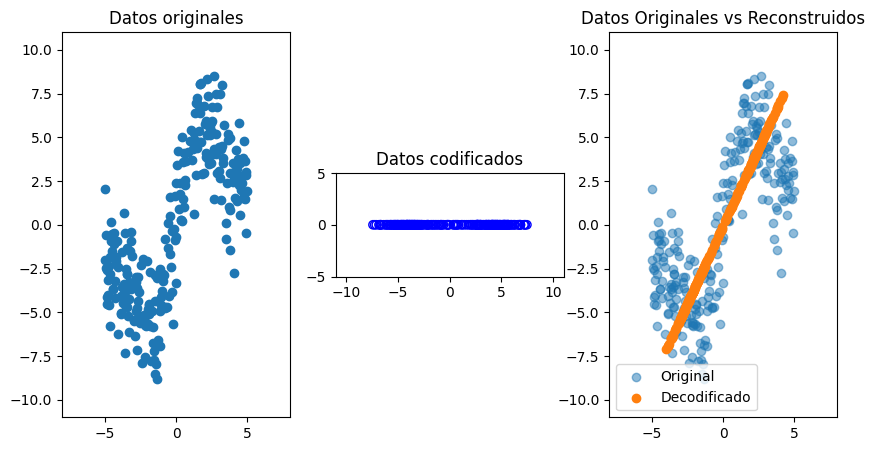

In [ ]:
# Codificador
input_layer = autoencoder.input

encoded = autoencoder.layers[1](input_layer)
encoded = autoencoder.layers[2](encoded)
encoded = autoencoder.layers[3](encoded)

encoder_model = Model(input_layer, encoded)

# Decodificador
encoded_input = Input(shape=(output_size,))
decoded = autoencoder.layers[4](encoded_input)
decoded = autoencoder.layers[5](decoded)
decoded = autoencoder.layers[6](decoded)

decoder_model = Model(encoded_input, decoded)


# Graficamos los resultados
Z_linAutEnc = encoder_model.predict(test_data_2)
data_2_decoded = decoder_model.predict(Z_linAutEnc)


plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.scatter(test_data_2[:,0],test_data_2[:,1])
plt.xlim(-8, 8) 
plt.ylim(-11, 11)
plt.title('Datos originales')

plt.subplot(1, 3, 2)
plt.scatter(Z_linAutEnc[:, 0], [0] * len(Z_linAutEnc[:, 0]), marker='o', facecolor='none', edgecolor='blue')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-11, 11)
plt.ylim(-5, 5)
plt.title('Datos codificados')

plt.subplot(1, 3, 3)
plt.scatter(test_data_2[:,0], test_data_2[:,1], alpha=0.5, label='Original')
plt.scatter(data_2_decoded[:,0], data_2_decoded[:,1], label='Decodificado')
plt.xlim(-8, 8) 
plt.ylim(-11, 11)
plt.title('Datos Originales vs Reconstruidos')
plt.legend()
plt.show()

#### Vinos

Epoch 1/100
1/3 [=========>....................] - ETA: 0s - loss: 16.2783

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - ETA: 0s - loss: 16.2169

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 2s 883ms/step - loss: 16.2169 - val_loss: 16.1070
Epoch 2/100
3/3 [==============================] - 2s 720ms/step - loss: 15.9605 - val_loss: 15.8548
Epoch 3/100
3/3 [==============================] - 1s 499ms/step - loss: 15.7212 - val_loss: 15.6148
Epoch 4/100
3/3 [==============================] - 1s 441ms/step - loss: 15.4937 - val_loss: 15.3859
Epoch 5/100
3/3 [==============================] - 1s 347ms/step - loss: 15.2800 - val_loss: 15.1668
Epoch 6/100
3/3 [==============================] - 1s 326ms/step - loss: 15.0656 - val_loss: 14.9555
Epoch 7/100
3/3 [==============================] - 1s 266ms/step - loss: 14.8615 - val_loss: 14.7511
Epoch 8/100
3/3 [==============================] - 1s 320ms/step - loss: 14.6667 - val_loss: 14.5525
Epoch 9/100
3/3 [==============================] - 1s 349ms/step - loss: 14.4725 - val_loss: 14.3598
Epoch 10/100
3/3 [==============================] - 1s 343ms/step - loss: 14.2852 - val_loss: 14.1721
E

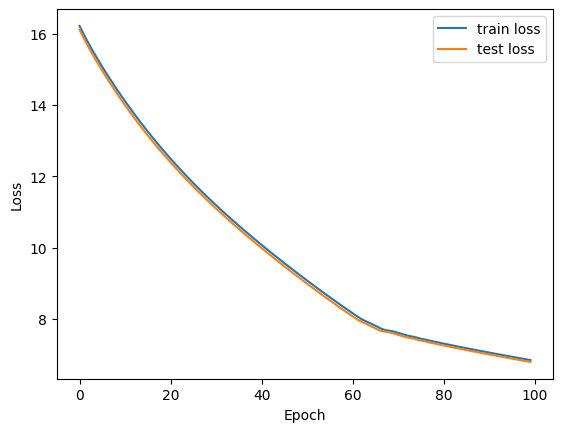

In [ ]:
input_size = train_data_3.shape[1]
output_size = 2

regularizer_input = OrtogonalidadPesosConstraint(dimension_codificacion=input_size, weightage=1., axis=0)
regularizer8 = OrtogonalidadPesosConstraint(dimension_codificacion=8, weightage=1., axis=0)
regularizer4 = OrtogonalidadPesosConstraint(dimension_codificacion=4, weightage=1., axis=0)
regularizer_output = OrtogonalidadPesosConstraint(dimension_codificacion=output_size, weightage=1., axis=0)

maxi = tf.keras.constraints.MaxNorm(max_value=2, axis=1)

input_layer = Input(shape=(input_size,))
encoded = Dense(8, activation='linear', kernel_constraint = maxi, kernel_regularizer=regularizer8)(input_layer)
encoded = Dense(4, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer4)(encoded)
encoded = Dense(output_size, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer_output)(encoded)

decoded = Dense(4, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer4)(encoded)
decoded = Dense(8, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer8)(decoded)
decoded = Dense(input_size, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer_input)(decoded)

autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(train_data_3, train_data_3, epochs=100, batch_size=32, validation_data=(test_data_3, test_data_3))

train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Graficar ambas curvas de pérdida
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

3/3 [==============================] - 0s 5ms/step


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


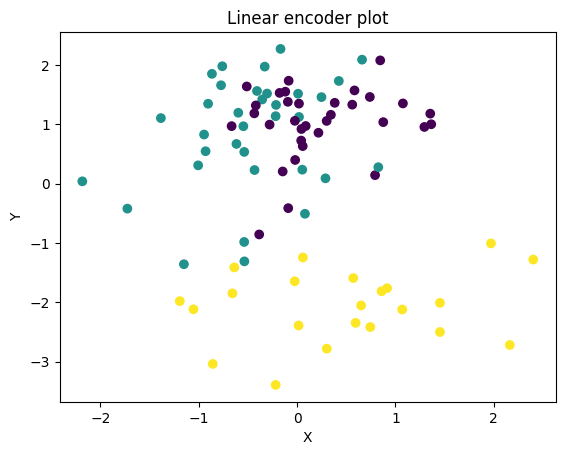

In [ ]:
# Codificador
input_layer = autoencoder.input

encoded = autoencoder.layers[1](input_layer)
encoded = autoencoder.layers[2](encoded)
encoded = autoencoder.layers[3](encoded)

encoder_model = Model(input_layer, encoded)

# Decodificador
encoded_input = Input(shape=(output_size,))
decoded = autoencoder.layers[4](encoded_input)
decoded = autoencoder.layers[5](decoded)
decoded = autoencoder.layers[6](decoded)

decoder_model = Model(encoded_input, decoded)


# Graficamos los resultados
Z_linAutEnc = encoder_model.predict(test_data_3)
data_3_decoded = decoder_model.predict(Z_linAutEnc)

fig, ax = plt.subplots()

# crea un scatter plot de los datos transformados, donde c1 y c2 son las dos componentes principales
ax.scatter(Z_linAutEnc[:, 0], Z_linAutEnc[:, 1], c=y_test) 

# establece los títulos y etiquetas de los ejes
ax.set_title('Linear encoder plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# muestra el gráfico
plt.show()


### Autoencoder no lineal


#### Nube de puntos

Epoch 1/100
8/8 [==============================] - 1s 104ms/step - loss: 22.5862 - val_loss: 22.5405
Epoch 2/100
8/8 [==============================] - 1s 100ms/step - loss: 22.0491 - val_loss: 22.0720
Epoch 3/100
8/8 [==============================] - 1s 115ms/step - loss: 21.5700 - val_loss: 21.6606
Epoch 4/100
8/8 [==============================] - 1s 96ms/step - loss: 21.1651 - val_loss: 21.3071
Epoch 5/100
8/8 [==============================] - 1s 122ms/step - loss: 20.8099 - val_loss: 20.9964
Epoch 6/100
8/8 [==============================] - 1s 135ms/step - loss: 20.5011 - val_loss: 20.7185
Epoch 7/100
8/8 [==============================] - 1s 148ms/step - loss: 20.2222 - val_loss: 20.4657
Epoch 8/100
8/8 [==============================] - 1s 95ms/step - loss: 19.9672 - val_loss: 20.2330
Epoch 9/100
8/8 [==============================] - 1s 115ms/step - loss: 19.7358 - val_loss: 20.0132
Epoch 10/100
8/8 [==============================] - 1s 98ms/step - loss: 19.5158 - val_loss: 

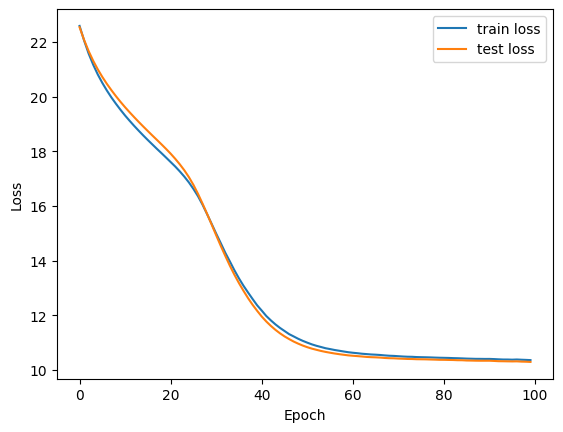

In [ ]:
input_size = train_data_1.shape[1]
output_size = 1

regularizer_input = OrtogonalidadPesosConstraint(dimension_codificacion=input_size, weightage=1., axis=0)
regularizer8 = OrtogonalidadPesosConstraint(dimension_codificacion=8, weightage=1., axis=0)
regularizer4 = OrtogonalidadPesosConstraint(dimension_codificacion=4, weightage=1., axis=0)
regularizer_output = OrtogonalidadPesosConstraint(dimension_codificacion=output_size, weightage=1., axis=0)

maxi = tf.keras.constraints.MaxNorm(max_value=2, axis=1)

input_layer = Input(shape=(input_size,))
encoded = Dense(8, activation='tanh', kernel_constraint = maxi, kernel_regularizer=regularizer8)(input_layer)
encoded = Dense(4, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer4)(encoded)
encoded = Dense(output_size, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer_output)(encoded)

decoded = Dense(4, activation='tanh',kernel_constraint = maxi,kernel_regularizer=regularizer4)(encoded)
decoded = Dense(8, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer8)(decoded)
decoded = Dense(input_size, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer_input)(decoded)

autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(train_data_1, train_data_1, epochs=100, batch_size=32, validation_data=(test_data_1, test_data_1))

train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Graficar ambas curvas de pérdida
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

8/8 [==============================] - 0s 3ms/step


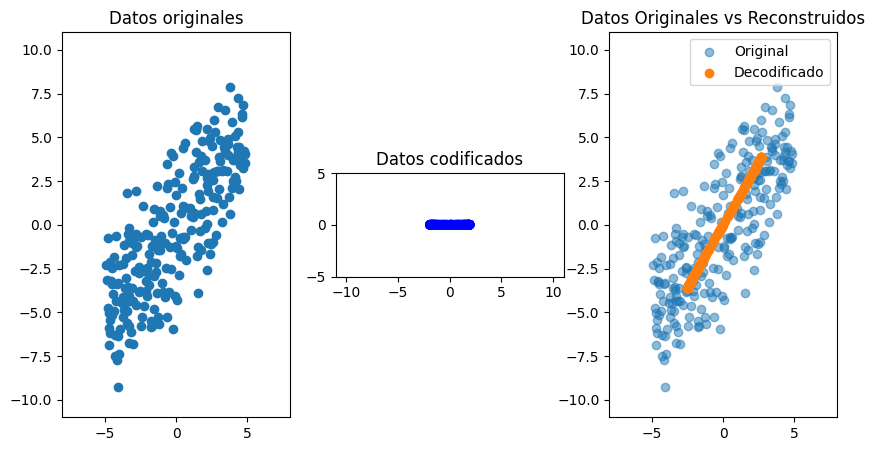

In [ ]:
# Codificador
input_layer = autoencoder.input

encoded = autoencoder.layers[1](input_layer)
encoded = autoencoder.layers[2](encoded)
encoded = autoencoder.layers[3](encoded)

encoder_model = Model(input_layer, encoded)

# Decodificador
encoded_input = Input(shape=(output_size,))
decoded = autoencoder.layers[4](encoded_input)
decoded = autoencoder.layers[5](decoded)
decoded = autoencoder.layers[6](decoded)

decoder_model = Model(encoded_input, decoded)


# Graficamos los resultados
Z_linAutEnc = encoder_model.predict(test_data_1)
data_1_decoded = decoder_model.predict(Z_linAutEnc)


plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.scatter(test_data_1[:,0],test_data_1[:,1])
plt.xlim(-8, 8) 
plt.ylim(-11, 11)
plt.title('Datos originales')

plt.subplot(1, 3, 2)
plt.scatter(Z_linAutEnc[:, 0], [0] * len(Z_linAutEnc[:, 0]), marker='o', facecolor='none', edgecolor='blue')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-11, 11)
plt.ylim(-5, 5)
plt.title('Datos codificados')

plt.subplot(1, 3, 3)
plt.scatter(test_data_1[:,0], test_data_1[:,1], alpha=0.5, label='Original')
plt.scatter(data_1_decoded[:,0], data_1_decoded[:,1], label='Decodificado')
plt.xlim(-8, 8) 
plt.ylim(-11, 11)
plt.title('Datos Originales vs Reconstruidos')
plt.legend()
plt.show()

#### Función trigonométrica

Epoch 1/100
8/8 [==============================] - 2s 212ms/step - loss: 22.6363 - val_loss: 24.0807
Epoch 2/100
8/8 [==============================] - 2s 298ms/step - loss: 22.2592 - val_loss: 23.7191
Epoch 3/100
8/8 [==============================] - 2s 249ms/step - loss: 21.9344 - val_loss: 23.3870
Epoch 4/100
8/8 [==============================] - 2s 254ms/step - loss: 21.6214 - val_loss: 23.0341
Epoch 5/100
8/8 [==============================] - 2s 262ms/step - loss: 21.2727 - val_loss: 22.6215
Epoch 6/100
8/8 [==============================] - 1s 116ms/step - loss: 20.8681 - val_loss: 22.1144
Epoch 7/100
8/8 [==============================] - 1s 128ms/step - loss: 20.3720 - val_loss: 21.5065
Epoch 8/100
8/8 [==============================] - 1s 129ms/step - loss: 19.8037 - val_loss: 20.8068
Epoch 9/100
8/8 [==============================] - 1s 114ms/step - loss: 19.1665 - val_loss: 20.0631
Epoch 10/100
8/8 [==============================] - 1s 97ms/step - loss: 18.5239 - val_loss

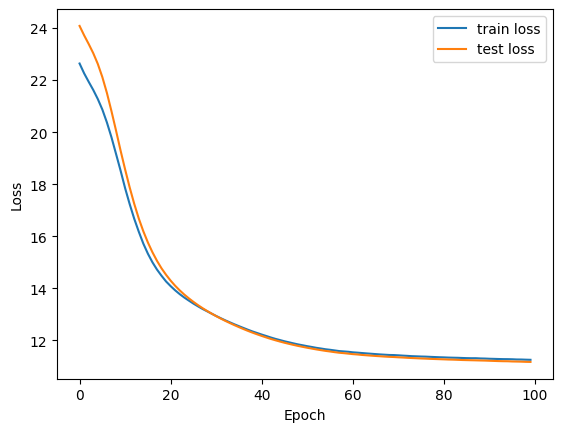

In [ ]:
input_size = train_data_2.shape[1]
output_size = 1

regularizer_input = OrtogonalidadPesosConstraint(dimension_codificacion=input_size, weightage=1., axis=0)
regularizer8 = OrtogonalidadPesosConstraint(dimension_codificacion=8, weightage=1., axis=0)
regularizer4 = OrtogonalidadPesosConstraint(dimension_codificacion=4, weightage=1., axis=0)
regularizer_output = OrtogonalidadPesosConstraint(dimension_codificacion=output_size, weightage=1., axis=0)

maxi = tf.keras.constraints.MaxNorm(max_value=25, axis=1)

input_layer = Input(shape=(input_size,))
encoded = Dense(8, activation='tanh', kernel_constraint = maxi, kernel_regularizer=regularizer8)(input_layer)
encoded = Dense(4, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer4)(encoded)
encoded = Dense(output_size, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer_output)(encoded)

decoded = Dense(4, activation='tanh',kernel_constraint = maxi,kernel_regularizer=regularizer4)(encoded)
decoded = Dense(8, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer8)(decoded)
decoded = Dense(input_size, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer_input)(decoded)

autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(train_data_2, train_data_2, epochs=100, batch_size=32, validation_data=(test_data_2, test_data_2))

train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Graficar ambas curvas de pérdida
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

8/8 [==============================] - 0s 3ms/step


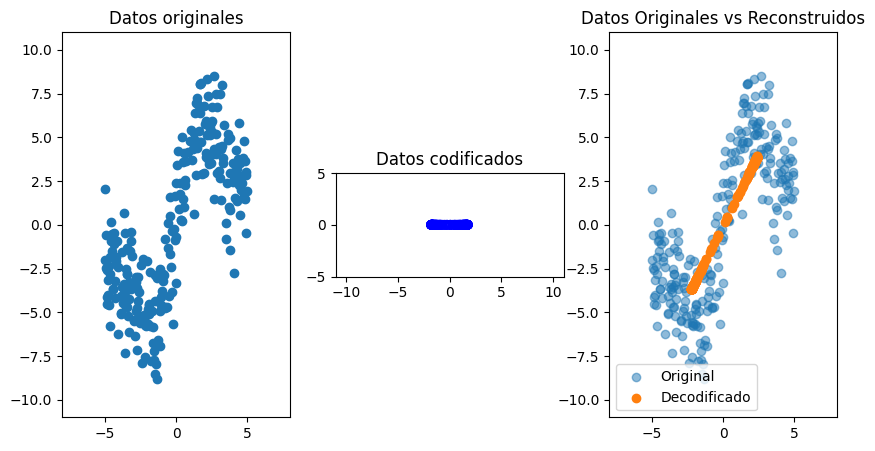

In [ ]:
# Codificador
input_layer = autoencoder.input

encoded = autoencoder.layers[1](input_layer)
encoded = autoencoder.layers[2](encoded)
encoded = autoencoder.layers[3](encoded)

encoder_model = Model(input_layer, encoded)

# Decodificador
encoded_input = Input(shape=(output_size,))
decoded = autoencoder.layers[4](encoded_input)
decoded = autoencoder.layers[5](decoded)
decoded = autoencoder.layers[6](decoded)

decoder_model = Model(encoded_input, decoded)


# Graficamos los resultados
Z_linAutEnc = encoder_model.predict(test_data_2)
data_2_decoded = decoder_model.predict(Z_linAutEnc)


plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.scatter(test_data_2[:,0],test_data_2[:,1])
plt.xlim(-8, 8) 
plt.ylim(-11, 11)
plt.title('Datos originales')

plt.subplot(1, 3, 2)
plt.scatter(Z_linAutEnc[:, 0], [0] * len(Z_linAutEnc[:, 0]), marker='o', facecolor='none', edgecolor='blue')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-11, 11)
plt.ylim(-5, 5)
plt.title('Datos codificados')

plt.subplot(1, 3, 3)
plt.scatter(test_data_2[:,0], test_data_2[:,1], alpha=0.5, label='Original')
plt.scatter(data_2_decoded[:,0], data_2_decoded[:,1], label='Decodificado')
plt.xlim(-8, 8) 
plt.ylim(-11, 11)
plt.title('Datos Originales vs Reconstruidos')
plt.legend()
plt.show()

#### Vinos

Epoch 1/150
1/3 [=========>....................] - ETA: 0s - loss: 15.0985

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 1s 226ms/step - loss: 15.0666 - val_loss: 14.8007
Epoch 2/150


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 155ms/step - loss: 14.8328 - val_loss: 14.5716
Epoch 3/150
3/3 [==============================] - 0s 156ms/step - loss: 14.6040 - val_loss: 14.3474
Epoch 4/150
3/3 [==============================] - 0s 120ms/step - loss: 14.3795 - val_loss: 14.1279
Epoch 5/150
3/3 [==============================] - 0s 156ms/step - loss: 14.1602 - val_loss: 13.9132
Epoch 6/150
3/3 [==============================] - 0s 122ms/step - loss: 13.9459 - val_loss: 13.7034
Epoch 7/150
3/3 [==============================] - 0s 159ms/step - loss: 13.7363 - val_loss: 13.4986
Epoch 8/150
3/3 [==============================] - 0s 159ms/step - loss: 13.5318 - val_loss: 13.2987
Epoch 9/150
3/3 [==============================] - 0s 154ms/step - loss: 13.3323 - val_loss: 13.1037
Epoch 10/150
3/3 [==============================] - 0s 151ms/step - loss: 13.1374 - val_loss: 12.9136
Epoch 11/150
3/3 [==============================] - 0s 157ms/step - loss: 12.9477 - val_loss: 12.7283


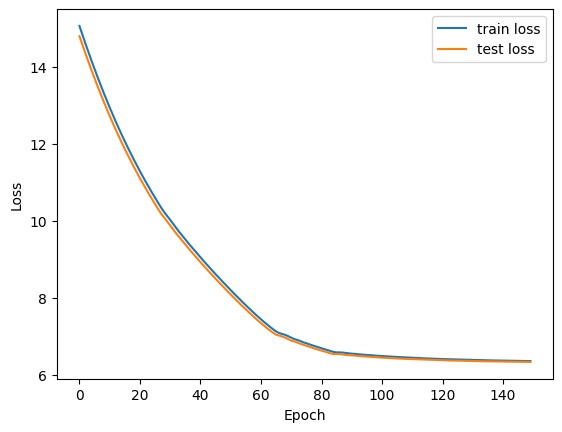

In [ ]:
input_size = train_data_3.shape[1]
output_size = 2

regularizer_input = OrtogonalidadPesosConstraint(dimension_codificacion=input_size, weightage=1., axis=0)
regularizer8 = OrtogonalidadPesosConstraint(dimension_codificacion=8, weightage=1., axis=0)
regularizer4 = OrtogonalidadPesosConstraint(dimension_codificacion=4, weightage=1., axis=0)
regularizer_output = OrtogonalidadPesosConstraint(dimension_codificacion=output_size, weightage=1., axis=0)

maxi = tf.keras.constraints.MaxNorm(max_value=25, axis=1)

input_layer = Input(shape=(input_size,))
encoded = Dense(8, activation='tanh', kernel_constraint = maxi, kernel_regularizer=regularizer8)(input_layer)
encoded = Dense(4, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer4)(encoded)
encoded = Dense(output_size, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer_output)(encoded)

decoded = Dense(4, activation='tanh',kernel_constraint = maxi,kernel_regularizer=regularizer4)(encoded)
decoded = Dense(8, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer8)(decoded)
decoded = Dense(input_size, activation='linear',kernel_constraint = maxi,kernel_regularizer=regularizer_input)(decoded)

autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(train_data_3, train_data_3, epochs=150, batch_size=32, validation_data=(test_data_3, test_data_3))

train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Graficar ambas curvas de pérdida
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

3/3 [==============================] - 0s 4ms/step


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


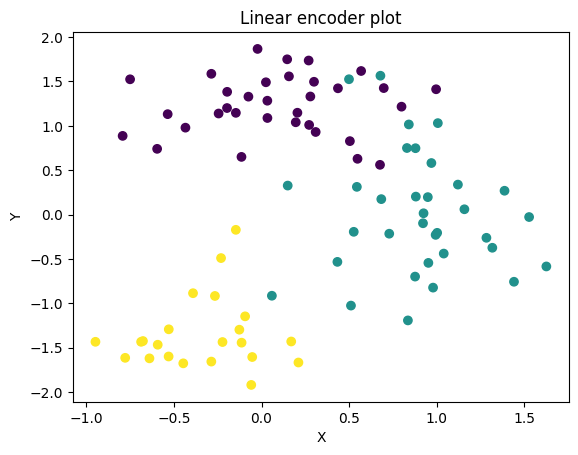

In [ ]:
# Codificador
input_layer = autoencoder.input

encoded = autoencoder.layers[1](input_layer)
encoded = autoencoder.layers[2](encoded)
encoded = autoencoder.layers[3](encoded)

encoder_model = Model(input_layer, encoded)

# Decodificador
encoded_input = Input(shape=(output_size,))
decoded = autoencoder.layers[4](encoded_input)
decoded = autoencoder.layers[5](decoded)
decoded = autoencoder.layers[6](decoded)

decoder_model = Model(encoded_input, decoded)


# Graficamos los resultados
Z_linAutEnc = encoder_model.predict(test_data_3)
data_3_decoded = decoder_model.predict(Z_linAutEnc)

fig, ax = plt.subplots()

# crea un scatter plot de los datos transformados, donde c1 y c2 son las dos componentes principales
ax.scatter(Z_linAutEnc[:, 0], Z_linAutEnc[:, 1], c=y_test) 

# establece los títulos y etiquetas de los ejes
ax.set_title('Linear encoder plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# muestra el gráfico
plt.show()

Hemos obtenido en el caso de las restricciones resultados muy similares a todo lo que habíamos obtenido anteriormente. En el único caso en el que si hay diferencias es en el conjunto de los vinos, en este, hemos obtenido resultados bastante interesantes para la tarea de clasificación.